# 1 Random forrest for email spam classiﬁer

Your task for this question is to build a spam classiﬁer using the UCR email spma dataset https://archive. ics.uci.edu/ml/datasets/Spambase came from the postmaster and individuals who had ﬁled spam. The collection of non-spam e-mails came from ﬁled work and personal e-mails, and hence the word ’george’ and the area code ’650’ are indicators of non-spam. These are useful when constructing a personalized spam ﬁlter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam ﬁlter. Load the data.


Importing Modules

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image 
from pydot import graph_from_dot_data
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve
import seaborn as sns
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split ,GridSearchCV,KFold
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, RidgeCV

1.1 (5 points) How many instances of spam versus regular emails are there in the data? How many data points there are? How many features there are? Note: there may be some missing values, you can just ﬁll in zero.

In [2]:
spambase = pd.read_csv('spambase.data',header=None)
spambase = spambase.fillna(0)
observations, variables = spambase.shape

total_features = variables-1 

spams = spambase[spambase.iloc[:,-1] == 1]
nonspams = spambase[spambase.iloc[:,-1] == 0]

print("Total Number of data points:{} ".format(observations))
print("Total Variables:{} ".format(total_features))
print("Total spam records: {}".format(len(spams)))
print("Total non-spam records: {}".format(len(nonspams)))

Total Number of data points:4601 
Total Variables:57 
Total spam records: 1813
Total non-spam records: 2788


1.2 (10 points) Build a classiﬁcation tree model (also known as the CART model). In Python, this can be done using sklearn.tree.DecisionTreeClassiﬁer. In our answer, you should report the tree models ﬁtted similar to what is shown in the “Random forest” lecture, Page 16, the tree plot. In Python, getting this plot can be done using sklearn.tree.plot tree function.

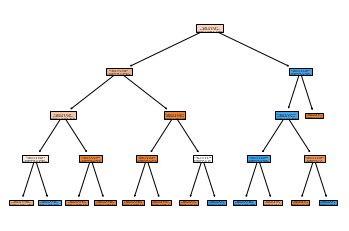

<Figure size 1200x640 with 0 Axes>

In [3]:
random_seed = 50
(Xtrain, Xtest, ytrain, ytest) = train_test_split(spambase.iloc[:, 0: -1], spambase.iloc[:, -1], test_size=0.2, random_state = random_seed )
classification = tree.DecisionTreeClassifier(max_features='sqrt', random_state=random_seed, max_depth = 4)
classification = classification.fit(Xtrain, ytrain)

# Lets print the tree plot using plot_tree function

tree.plot_tree(classification, filled = True )
plt.figure(num=None, figsize=(1000, 200), dpi=80, facecolor='w', edgecolor='k')
fig = plt.gcf()
fig.set_size_inches(15, 8)


1.3. (15 points) Also build a random forrest model. In Python, this can be done using sklearn.ensemble.RandomForestClassiﬁer. Now partition the data to use the ﬁrst 80% for training and the remaining 20% for testing. Your task is to compare and report the AUC for your classiﬁcation tree and random forest models on testing data, respectively. To report your results, please try diﬀerent tree sizes. Plot the curve of AUC versus Tree Size, similar to Page 15 of the Lecture Slides on “Random Forest”. Background information: In classiﬁcation problem, we use AUC (Area Under The Curve) as a performance measure. It is one of the most important evaluation metrics for checking any classiﬁcation model?s performance. ROC (Receiver Operating Characteristics) curve measures classiﬁcation accuracy at various thresholds settings. AUC measures the total area under the ROC curve. Higher the AUC, better the model is at distinguishing the two classes. If you want to read a bit more about AUC curve, check out this link https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5 For instance, in Python, this can be done using sklearn.metrics.roc auc score and you will have to ﬁgure out the details.

In [4]:
Random_Forest = RandomForestClassifier(n_estimators=10, random_state=random_seed, max_features='sqrt')
Random_Forest = Random_Forest.fit(Xtrain, ytrain)

# Calculating AUC for Random Forest Classifer
y_test_pred = Random_Forest.predict(Xtest)
y_test_prob = Random_Forest.predict_proba(Xtest)[:,1]

#Calculating AUC for Classification Tree Model
clf_y_test_pred = classification.predict(Xtest)
clf_y_test_prob = classification.predict_proba(Xtest)[:,1]

print(f'Decision Tree : Test ROC AUC  Score: {roc_auc_score(ytest, clf_y_test_prob)}')
print(f'Random Forest : Test ROC AUC  Score: {roc_auc_score(ytest, y_test_prob)}')

Decision Tree : Test ROC AUC  Score: 0.9177935190036678
Random Forest : Test ROC AUC  Score: 0.9870168473660876


## Plotting AUC

When you compare the AUC of the Decision Tree Classifier with the Random Forest Classifier, it is clear that Random Forest performs better. 
However, we have provided "UNLIMITED Depth" to both classifiers which can easily result in extreme overfitting.
Let's retrieve AUC score for both the method for varying number of "Depth" of Trees - ranging from 4 to 20

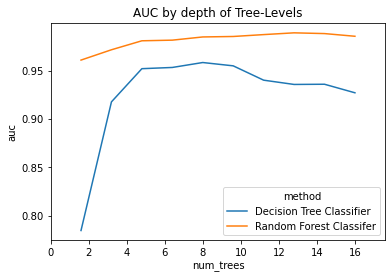

In [5]:
def calc_roc_by_max_depth(Xtrain, Xtest, ytrain, ytest, max_depth, random_seed):
    # determine ROC for Decision Tree Classifer
    classification = tree.DecisionTreeClassifier(max_features='sqrt', max_depth=max_depth, random_state=random_seed)
    classification = classification.fit(Xtrain, ytrain)
    classification_y_test_prob = classification.predict_proba(Xtest)[:,1]
    classification_auc = roc_auc_score(ytest, classification_y_test_prob)
    
    # determine ROC for Random Forest Classifier
    Random_Forest = RandomForestClassifier(n_estimators=10,max_depth=max_depth,max_features='sqrt',random_state=random_seed)
    Random_Forest = Random_Forest.fit(Xtrain, ytrain)
    Random_Forest_y_test_prob = Random_Forest.predict_proba(Xtest)[:,1]
    Random_Forest_auc = roc_auc_score(ytest, Random_Forest_y_test_prob)
    
    return classification_auc, Random_Forest_auc

# Range for depth of trees from 2 to 20, calculate ROC using both methods
rec_list = []
for n in range(2,22,2):
    classification_auc,Random_Forest_auc = calc_roc_by_max_depth(Xtrain, Xtest, ytrain, ytest, n , random_seed)
    #print("For depth = {} , clf_roc = {} rnf_roc = {} ".format(n,clf_roc,rnf_roc))
    rec_list.append([n,classification_auc, 'Decision Tree Classifier'])
    rec_list.append([n,Random_Forest_auc,'Random Forest Classifer'])
    
data_df = pd.DataFrame(rec_list, columns=['num_trees','auc','method'])
xlabels=[0,2,4,6,8,10,12,14,16,18,20]
ax = sns.lineplot(x = 'num_trees', y = 'auc', hue= 'method',data=data_df)
ax.set(xlim=(0, 22))
ax.set(title="AUC by depth of Tree-Levels")
ax.set_xticklabels(xlabels);

# 2 Nonlinear regression and cross-validation

The coefficient of thermal expansion y changes with temperature x. An experiment to relate y to x was done. Temperature was measured in degrees Kelvin. (The Kelvin temperature is the Celcius temperature plus 273.15). The raw data file is copper-new.txt.

2.1. (10 points) Perform linear regression on the data. Report the ﬁtted model and the ﬁtting error.

In [6]:
copper_data=pd.read_csv('copper-new.txt',header=None,delimiter = ' ',skipinitialspace = True,engine='python', 
                        names=['coefficient','temperature'])
linear_regressor = LinearRegression()
x = np.reshape(np.asarray(copper_data['temperature']) ,(-1,1))
y = np.reshape(np.asarray(copper_data['coefficient']) ,(-1,1))
linear_regressor.fit(x,y) 

ypredict = linear_regressor.predict(x)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y , ypredict))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y , ypredict))

Mean squared error: 10.52
Coefficient of determination: 0.69


2.2  Perform nonlinear regression with polynomial regression function up to degree n = 10 and use ridge regression (see Lecture Slides for "Bias-Variance Tradeoff"). Write down your formulation and strategy for doing this, the form of the ridge regression.

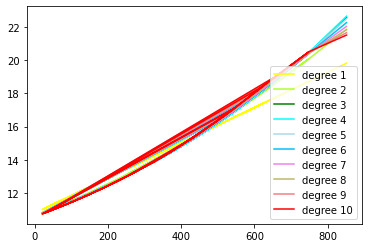

In [7]:
colors=['yellow','greenyellow','green','aqua', 'lightblue', 'deepskyblue','violet','darkkhaki','lightcoral','red']
polynomial_features= PolynomialFeatures(degree=10)
model = make_pipeline(polynomial_features, Ridge())
model.fit(np.reshape(np.asarray(copper_data['coefficient']) ,(-1,1)) ,copper_data['coefficient'] )
for deg in range(10) :
    degree= deg+1
    polynomial_features= PolynomialFeatures(degree=degree)
    model = make_pipeline(polynomial_features, Ridge(normalize = True))
    model.fit(np.reshape(np.asarray(copper_data['temperature']) ,(-1,1)) ,copper_data['coefficient'] )
    yplot = model.predict(np.reshape(np.asarray(copper_data['temperature']) ,(-1,1)) )
    plt.plot(np.reshape(np.asarray(copper_data['temperature']) ,(-1,1)) , yplot, color=colors[deg],
            label="degree %d" % degree)
plt.legend(loc='lower right')
plt.show()

2.3. (10 points) Use 5 fold cross validation to select the optimal regularization parameter Lambda .Plot the cross validation curve and report the optimal lambda.


In [8]:
# Using 5-fold cross validation and degree of 10
X = np.reshape(np.asarray(copper_data['temperature']) ,(-1,1))
y = np.reshape(np.asarray(copper_data['coefficient']) ,(-1,1))
alpha_values=[ 0.001, 0.01, 0.1 , 0.5 ,1, 5 ]
kf = KFold(n_splits=5, shuffle=True, random_state=random_seed)
polynomial_features= PolynomialFeatures(degree=10)
ridge_mse=[]
for a in alpha_values:
    ridge_cv_model = Ridge(alpha=a, normalize=True)  
    cv_mse=[]
    for train_idx,test_idx in kf.split(X):
        x_train_cv ,x_test_cv = X[train_idx], X[test_idx] 
        y_train_cv ,y_test_cv = y[train_idx], y[test_idx] 
        x_train_poly=polynomial_features.fit_transform(x_train_cv)
        x_test_poly=polynomial_features.fit_transform(x_test_cv)
        ridge_cv_model.fit(x_train_poly, y_train_cv)
        y_pred_cv=ridge_cv_model.predict(x_test_poly)
        theta=ridge_cv_model.coef_
        mse=np.sum((y_pred_cv - y_test_cv)**2)/len(y_pred_cv) + a*np.sum(theta**2)
        cv_mse.append(mse)
    
    ridge_mse.append((a, np.mean(cv_mse)))
df = pd.DataFrame(ridge_mse, columns =['alpha_values','mse']) 
df2= df[df.mse == df.mse.min()]
Optimal_Lambda = df2.iloc[0]['alpha_values']
print("Optimal value of Lambda is:",Optimal_Lambda )


Optimal value of Lambda is: 0.01


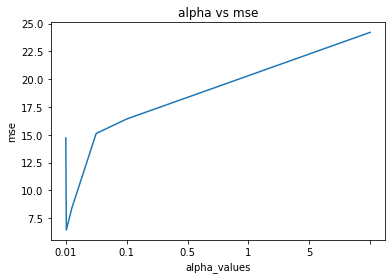

In [9]:
xlabels=alpha_values
ax = sns.lineplot(x = 'alpha_values', y = 'mse',data=df)
ax.set(title="alpha vs mse")
ax.set_xticklabels(xlabels);



2.4. (10 points) Predict the coefcient at 400 degree Kelvin using both models. Comment on how would you compare the accuracy of predictions.


In [10]:
linear_regressor_pred = linear_regressor.predict(np.reshape([400],(-1,1)))
print('Linear Regression Coefficient: ',linear_regressor_pred[0][0])
non_linear_regressor= model.predict(np.reshape([400],(-1,1)))
print('Non linear regressor with polynomial regression Coefficient: ',non_linear_regressor[0])

Linear Regression Coefficient:  15.89738508809276
Non linear regressor with polynomial regression Coefficient:  14.866014785537029


In [11]:
linear_reg_pred = linear_regressor.predict(x)
print("Linear Regressor Accuracy: ",round(r2_score(y, linear_reg_pred,multioutput='variance_weighted')*100,2),'%')
non_linear_reg_pred = model.predict(x)
print("Non-Linear Regressor Accuracy:",round(r2_score(y, non_linear_reg_pred,multioutput='variance_weighted')*100,2),'%')

Linear Regressor Accuracy:  68.62 %
Non-Linear Regressor Accuracy: 53.16 %
